# 1. The datasets: CIFAR-3

##Load the datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import data
X = np.load("Documents/ISMIN/2A/ML/TP/CIFAR-3/X_cifar.npy")
X_gray = np.load("Documents/ISMIN/2A/ML/TP/CIFAR-3/X_cifar_grayscale.npy")
Y = np.load("Documents/ISMIN/2A/ML/TP/CIFAR-3/Y_cifar.npy")


##Min Max values and shape of the datasets elements

In [ ]:
# max and min values
max = np.max(X_gray)
min = np.min(X_gray)
print(f"Max value : {max} \n")
print(f"Min value : {min} \n")

# Show size
print(f"Size of X :{np.shape(X)}")
print(f"Size of X_gray :{np.shape(X_gray)}")
print(f"Size of Y :{np.shape(Y)} \n")

Max value : 255 

Min value : 0 

Size of X :(18000, 32, 32, 3)
Size of X_gray :(18000, 32, 32)
Size of Y :(18000,) 



##Display samples

###Gray and colored

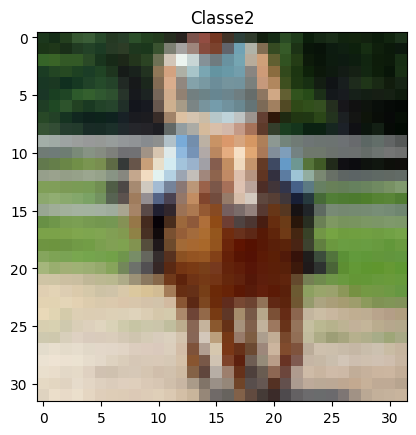

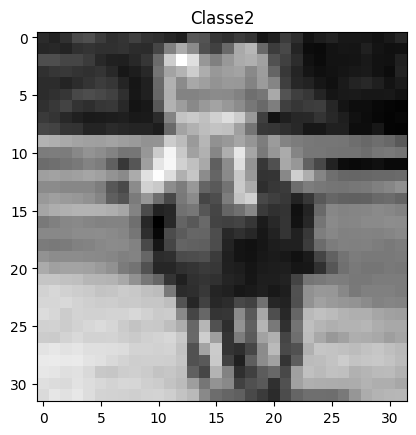

In [ ]:
#Display samples
  # Colored image
nb_sample = 123
plt.imshow(X[nb_sample])
img_title = "Classe" + str(Y[nb_sample])
plt.title(img_title)
plt.show()

  # Grayscale image
plt.imshow(X_gray[nb_sample], cmap='gray')
img_title = "Classe" + str(Y[nb_sample])
plt.title(img_title)
plt.show()

###3 different classes

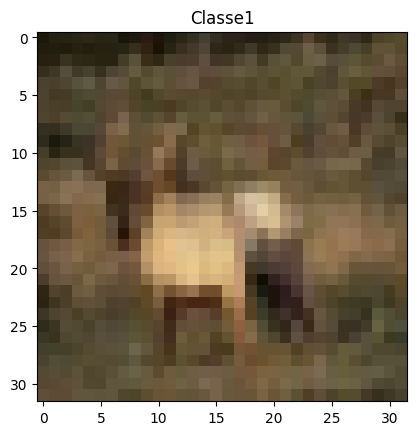

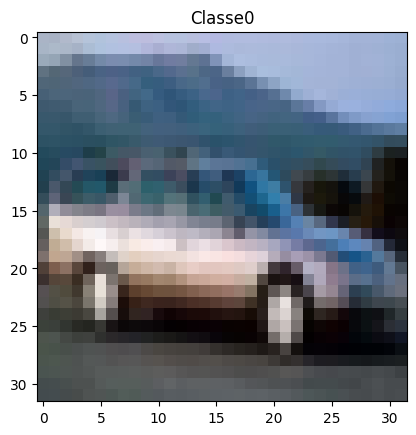

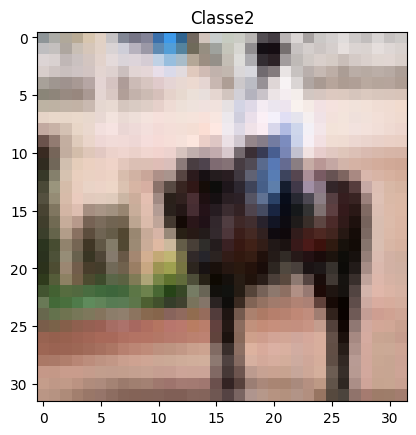

In [ ]:
plt.imshow(X[0])
img_title = "Classe" + str(Y[0])
plt.title(img_title)
plt.show()

plt.imshow(X[1])
img_title = "Classe" + str(Y[1])
plt.title(img_title)
plt.show()

plt.imshow(X[5])
img_title = "Classe" + str(Y[5])
plt.title(img_title)
plt.show()

##Dataset normalization and test train split

In [ ]:
# Normalize dataset
X_gray = X_gray / max
X = X / max

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,shuffle=True, test_size=0.2)

##Class frequency in train test datasets


In [ ]:
classe_0 = 0
classe_1 = 0
classe_2 = 0

for i in range(np.shape(Y_train)[0]):
  if Y_train[i] == 0:
    classe_0 += 1
  if Y_train[i] == 1:
    classe_1 += 1
  if Y_train[i] == 2:
    classe_2 += 1

print(f"Classes in Y_train \n")
print(f"class_0 {classe_0} \n")
print(f"class_1 {classe_1} \n")
print(f"class_2 {classe_2} \n")

print("=========================================================================\n")

classe_0 = 0
classe_1 = 0
classe_2 = 0

for i in range(np.shape(Y_test)[0]):
  if Y_train[i] == 0:
    classe_0 += 1
  if Y_train[i] == 1:
    classe_1 += 1
  if Y_train[i] == 2:
    classe_2 += 1

print(f"Classes in Y_test \n")
print(f"class_0 {classe_0} \n")
print(f"class_1 {classe_1} \n")
print(f"class_2 {classe_2} \n")



Classes in Y_train 

class_0 4767 

class_1 4830 

class_2 4803 


Classes in Y_test 

class_0 1206 

class_1 1220 

class_2 1174 



#2. DIMENSIONALITY REDUCTION WITH THE PCA

##PCA compression plot

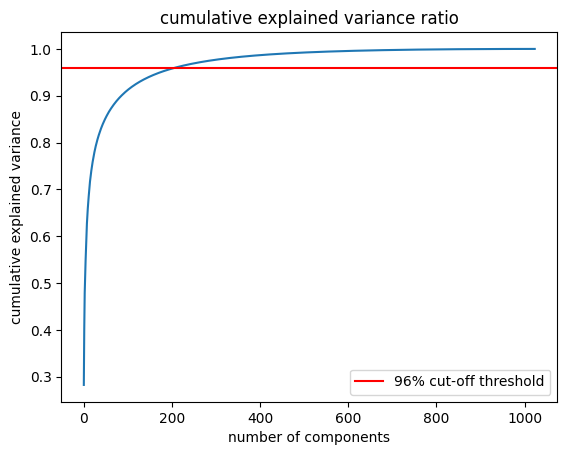

In [ ]:
from sklearn.decomposition import *

# Reshape dataset
X_gray_reshaped = np.reshape(X_gray,(18000,32*32))

# PCA transform
pca = PCA().fit(X_gray_reshaped)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.96, color='r', linestyle='-',label="96% cut-off threshold")
plt.title("cumulative explained variance ratio")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend()



##Optimal PCA dimension

In [ ]:
# Find number of components for 96%
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(cumsum >= 0.96) + 1
print(f"Optimal n_components : {n_components_optimal} \n")

Optimal n_components : 209 



##PCA compression effect on the dataset

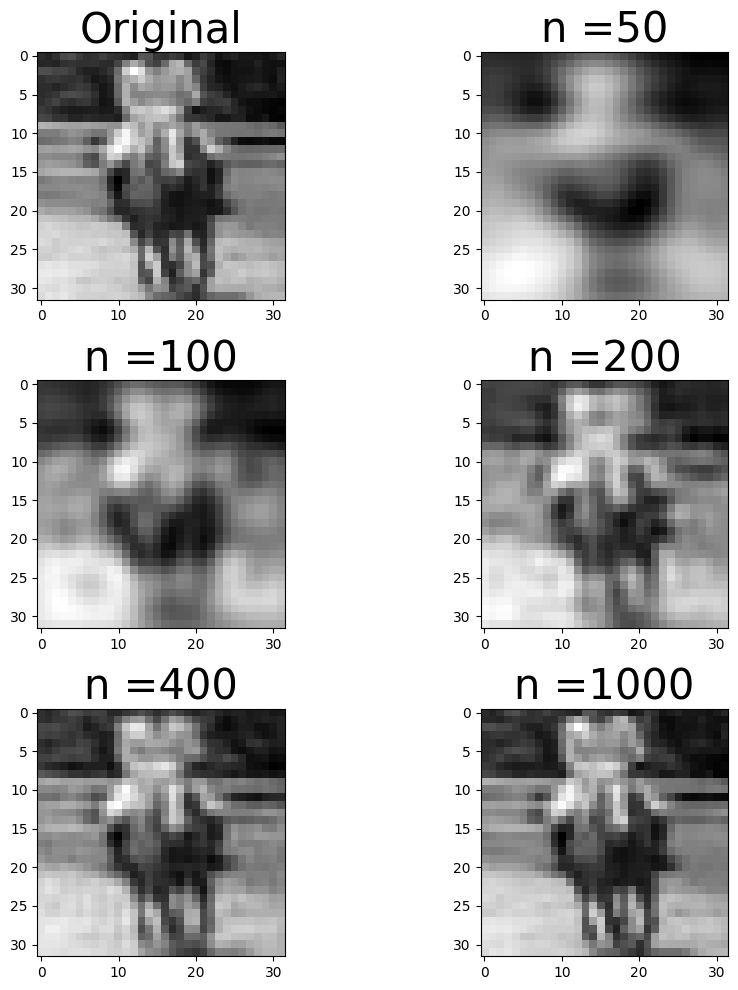

In [ ]:
# Show images with different n_components

n_components = [50,100,200,400,1000]
fig, axes = plt.subplots(3,2, figsize=(10, 10))

c = 0
for i in range(0,3):
  for j in range(0,2):
    if i==0 and j==0:
      axes[0][0].imshow(X_gray_reshaped[nb_sample].reshape((32, 32)), cmap='gray')
      axes[0][0].set_title('Original',fontsize=30)
    else:
      pca = PCA(n_components=n_components[c])
      X_pca = pca.fit_transform(X_gray_reshaped)
      reconstructed_image = pca.inverse_transform(X_pca[nb_sample, :])
      axes[i][j].imshow(reconstructed_image.reshape((32, 32)), cmap='gray')
      axes[i][j].set_title(f"n ={n_components[c]}",fontsize=30)
      c += 1

plt.tight_layout()
plt.show()


##PCA method applied to our dataset

In [ ]:
# PCA transform gray dataset
pca = PCA(n_components=n_components_optimal)
X_gray_pca = pca.fit_transform(X_gray_reshaped)

#3. Supervised Machine Learning



##Logistic Regression & Gaussian Naïve Bayes Classifier

Compressed dataset with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Train test split gray pca
X_pca_gray_train, X_pca_gray_test, Y_pca_gray_train, Y_pca_gray_test = train_test_split(X_gray_pca,Y,shuffle=True, test_size=0.25)

# Logistic regression model
  # Training model
logisticModel = LogisticRegression()
logisticModel.fit(X_pca_gray_train, Y_pca_gray_train)
  # Testing model
logisticModelPredictions = logisticModel.predict(X_pca_gray_test)
logisticModelAccuracy = accuracy_score(Y_pca_gray_test, logisticModelPredictions)
  # Result
print(f"Logistic Regression with compressed data by PCA method\n")
print(f"Testing Accuracy : {logisticModelAccuracy} \n")
print(f"Training Accuracy :{logisticModel.score(X_pca_gray_train,Y_pca_gray_train)}\n")
print(classification_report(Y_pca_gray_test, logisticModelPredictions))


Logistic Regression with compressed data by PCA method

Testing Accuracy : 0.6142222222222222 

Training Accuracy :0.6256296296296296

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1505
           1       0.57      0.62      0.59      1513
           2       0.57      0.50      0.53      1482

    accuracy                           0.61      4500
   macro avg       0.61      0.61      0.61      4500
weighted avg       0.61      0.61      0.61      4500



/home/adam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dataset not compressed with PCA


In [ ]:
# Train test split gray pca
X_gray_train, X_gray_test, Y_gray_train, Y_gray_test = train_test_split(X_gray_reshaped,Y,shuffle=True, test_size=0.25)

# Logistic regression model
  # Training model
logisticModel = LogisticRegression()
logisticModel.fit(X_gray_train, Y_gray_train)
  # Testing model
logisticModelPredictions = logisticModel.predict(X_gray_test)
logisticModelAccuracy = accuracy_score(Y_gray_test, logisticModelPredictions)
  # Result
print(f"Logistic Regression with uncompressed dataset\n")
print(f"Testing Accuracy : {logisticModelAccuracy} \n")
print(f"Training Accuracy :{logisticModel.score(X_gray_train,Y_gray_train)}\n")
print(classification_report(Y_gray_test, logisticModelPredictions))


Logistic Regression with uncompressed dataset

Testing Accuracy : 0.5937777777777777 

Training Accuracy :0.6403703703703704

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1436
           1       0.55      0.61      0.58      1557
           2       0.55      0.49      0.52      1507

    accuracy                           0.59      4500
   macro avg       0.59      0.60      0.59      4500
weighted avg       0.59      0.59      0.59      4500



/home/adam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Gaussian Naïve Bayes Classifier


Dataset compressed using PCA method

In [ ]:
# Gaussian Naïve Bayes Classifier
  # Training model
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_pca_gray_train,Y_pca_gray_train)
  # Testing model
naiveBayesPredictions = naiveBayesModel.predict(X_pca_gray_test)
naiveBayesAccuracy = accuracy_score(Y_pca_gray_test, naiveBayesPredictions)
  # Result
print(f"Gaussian Naïve Bayes Classifier with compressed dataset\n")
print(f"Testing Accuracy : {naiveBayesAccuracy} \n")
print(f"Training Accuracy :{naiveBayesModel.score(X_pca_gray_train,Y_pca_gray_train)}\n")
print(classification_report(Y_pca_gray_test, naiveBayesPredictions))


Gaussian Naïve Bayes Classifier with compressed dataset

Testing Accuracy : 0.6104444444444445 

Training Accuracy :0.6091111111111112

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1505
           1       0.59      0.74      0.66      1513
           2       0.55      0.42      0.48      1482

    accuracy                           0.61      4500
   macro avg       0.61      0.61      0.60      4500
weighted avg       0.61      0.61      0.60      4500



Uncompressed Dataset


In [ ]:
# Gaussian Naïve Bayes Classifier
  # Training model
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_gray_train,Y_gray_train)
  # Testing model
naiveBayesPredictions = naiveBayesModel.predict(X_gray_test)
naiveBayesAccuracy = accuracy_score(Y_gray_test, naiveBayesPredictions)
  # Result
print(f"Gaussian Naïve Bayes Classifier with uncompressed dataset\n")
print(f"Testing Accuracy : {naiveBayesAccuracy} \n")
print(f"Training Accuracy :{naiveBayesModel.score(X_gray_train,Y_gray_train)}\n")
print(classification_report(Y_gray_test, naiveBayesPredictions))

Gaussian Naïve Bayes Classifier with uncompressed dataset

Testing Accuracy : 0.584 

Training Accuracy :0.583925925925926

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1436
           1       0.54      0.73      0.62      1557
           2       0.58      0.38      0.46      1507

    accuracy                           0.58      4500
   macro avg       0.59      0.58      0.57      4500
weighted avg       0.59      0.58      0.57      4500



#4. Deep Learning / MULTILAYER PERCEPTRON (MLP)

##Best model with 1 hidden layer

###Model training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, Dropout, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Model caractéristics
nb_classes = 3
epochs = 100
batch_size = 256
dropout = 0.65

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_gray_reshaped, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

# Input layer
inputLayer = Input(shape=1024)
x = tf.keras.layers.Flatten()(inputLayer)
# Hidden layer 1
x = Dense(256)(x)
x = ReLU()(x)
x = Dropout(dropout)(x)
# Output layer
outputLayer = Dense(nb_classes, activation='softmax')(x)

# Create model
model = Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00013),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=70)

  # Info
model.summary()

# Training Model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test),callbacks=[es])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024)]            0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 re_lu_1 (ReLU)              (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 263171 (1.00 MB)
Trainable params: 263171 (1.

###Model performance analysis

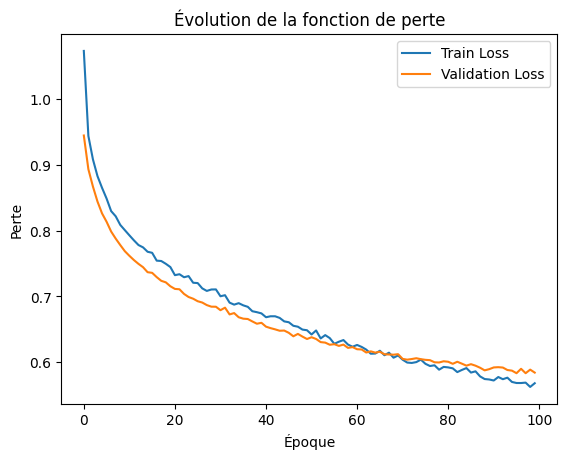

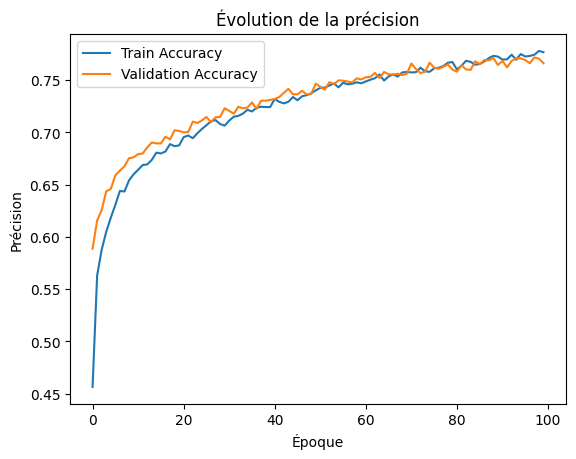

113/113 [==============================] - 0s 1ms/step - loss: 0.5841 - categorical_accuracy: 0.7661
Train loss : 0.49080365896224976 

Train accuracy : 0.8145833611488342 

Validation loss : 0.5841126441955566 

Validation accuracy : 0.7661111354827881 



In [ ]:
# Loss function
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Accuracy function
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

# Results of model performance
trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")

##Model for hyperparameters testing

###Model training

In [ ]:

# Model caractéristics
nb_classes = 3
epochs = 100
batch_size = 256
dropout = 0.1

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_gray_reshaped, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

# Input layer
inputLayer = Input(shape=1024)
x = tf.keras.layers.Flatten()(inputLayer)
# Hidden layer 1
x = Dense(256)(x)
x = ReLU()(x)
x = Dropout(dropout)(x)
# Output layer
outputLayer = Dense(nb_classes, activation='softmax')(x)

# Create model
model = Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.00013),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=70)

  # Info
model.summary()

# Training Model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test),callbacks=[es])


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1024)]            0         
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 re_lu_3 (ReLU)              (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 263171 (1.00 MB)
Trainable params: 263171 (1.

###Model performance analysis

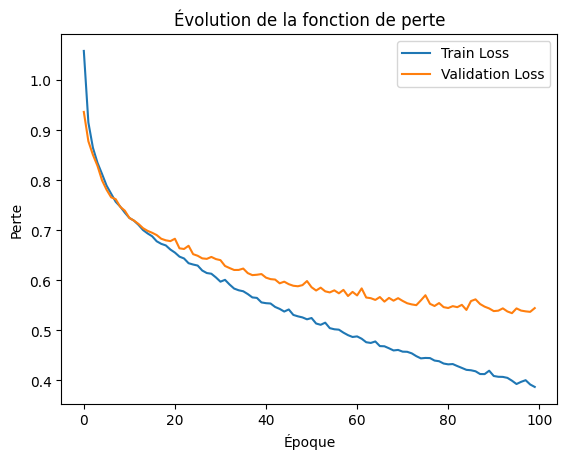

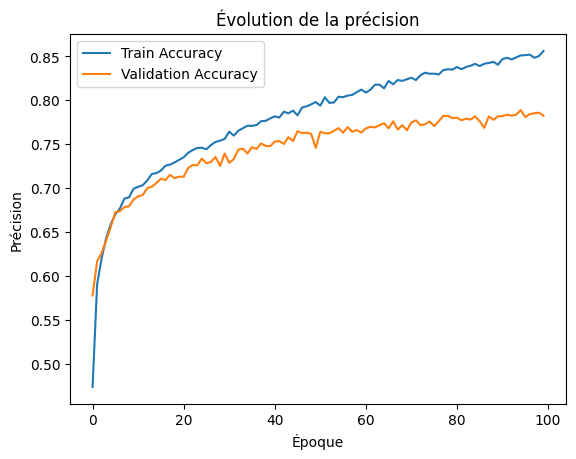

113/113 [==============================] - 0s 1ms/step - loss: 0.5446 - categorical_accuracy: 0.7825
Train loss : 0.3811133801937103 

Train accuracy : 0.8593055605888367 

Validation loss : 0.5446105599403381 

Validation accuracy : 0.7825000286102295 



In [ ]:
# Loss function
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Accuracy function
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

# Results of model performance
trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")

##Best model with multiple hidden layers

In [ ]:
# Model caractéristics
nb_classes = 3
epochs = 100
batch_size = 256
dropout = 0.5

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_gray_reshaped, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

# Input layer
inputLayer = Input(shape=1024)
x = tf.keras.layers.Flatten()(inputLayer)
# Hidden layer 1
x = Dense(512)(x)
x = ReLU()(x)
x = Dropout(0.69)(x)
# Hidden layer 2
x = Dense(256)(x)
x = ReLU()(x)
x = Dropout(0.69)(x)
outputLayer = Dense(nb_classes, activation='softmax')(x)

# Create model
model = Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.000149),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
  # Info
model.summary()

# Training Model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1024)]            0         
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               524800    
                                                                 
 re_lu_11 (ReLU)             (None, 512)               0         
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 re_lu_12 (ReLU)             (None, 256)               0   

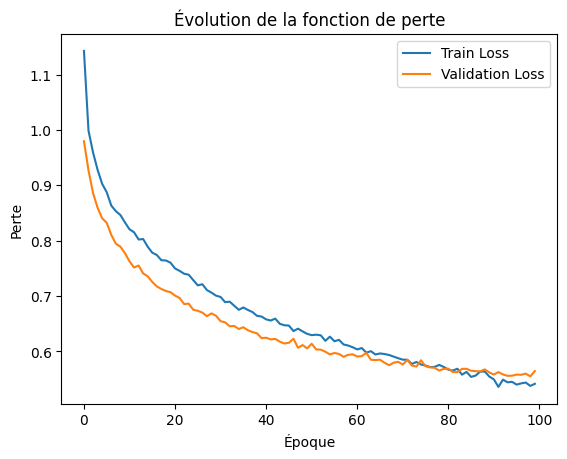

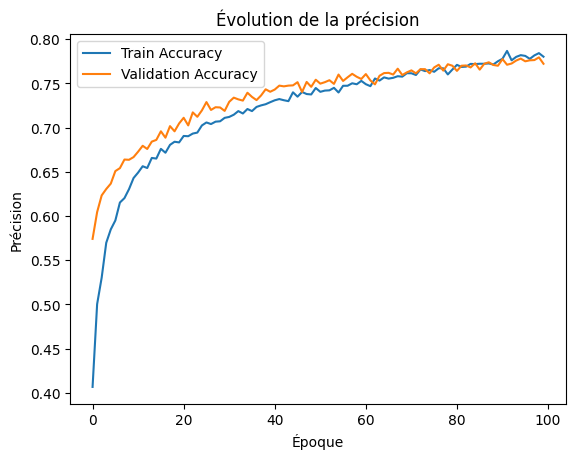

113/113 [==============================] - 0s 1ms/step - loss: 0.5644 - categorical_accuracy: 0.7722
Train loss : 0.43811556696891785 

Train accuracy : 0.8331249952316284 

Validation loss : 0.5644442439079285 

Validation accuracy : 0.7722222208976746 



In [ ]:
# Loss function
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Accuracy function
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

# Results of model performance
trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")

#5. Deep Learning / CONVOLUTIONNAL NEURAL NETWORK (CNN)

##Best model with 1 convolutional layer


###Model training

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Model caractéristics
nb_classes = 3
epochs = 50
batch_size = 512

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3),))
model.add(layers.MaxPooling2D((8, 8)))
model.add(layers.Flatten())

model.add(layers.Dense(3, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


# Affichage de la structure du modèle
model.summary()


history = model.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test, Y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 128)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 3)                 3459      
                                                                 
Total params: 7043 (27.51 KB)
Trainable params: 7043 (27.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
29/29 [==============================] - 2s 70ms/step - loss: 1.0389 - catego

###Model performance analysis

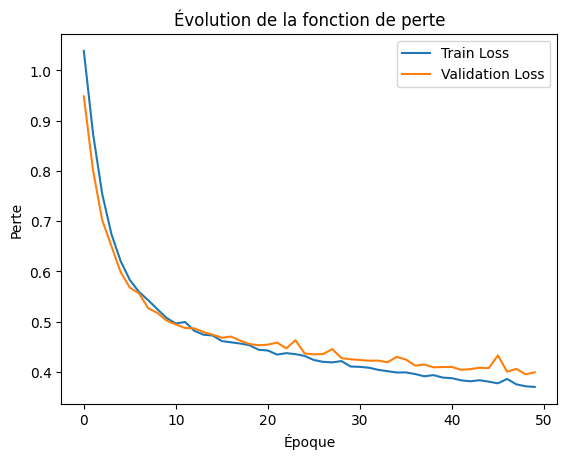

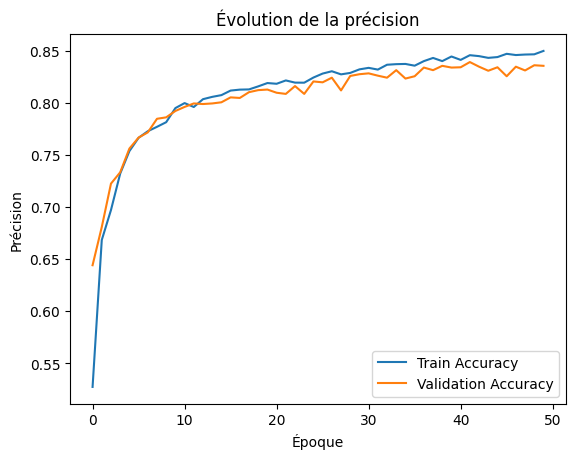

113/113 [==============================] - 0s 2ms/step - loss: 0.3989 - categorical_accuracy: 0.8356
Train loss : 0.3724433183670044 

Train accuracy : 0.8461805582046509 

Validation loss : 0.39885085821151733 

Validation accuracy : 0.8355555534362793 



In [ ]:
# Traçage de la fonction de perte pour l'ensemble d'entraînement et de validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Traçage de la précision pour l'ensemble d'entraînement et de validation
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")

##Model for hyperparemeters testing

###Model training


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Model caractéristics
nb_classes = 3
epochs = 50
batch_size = 512

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=tf.keras.regularizers.l2(0.0)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(3, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0007),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


# Affichage de la structure du modèle
model.summary()


history = model.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test, Y_test))

###Model performance analysis

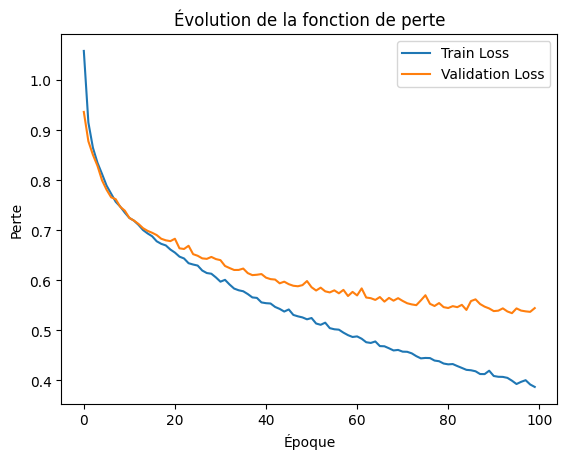

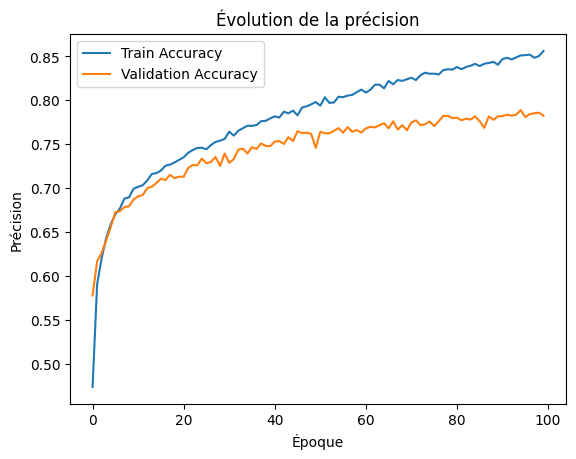

113/113 [==============================] - 0s 1ms/step - loss: 0.5446 - categorical_accuracy: 0.7825
Train loss : 0.3811133801937103 

Train accuracy : 0.8593055605888367 

Validation loss : 0.5446105599403381 

Validation accuracy : 0.7825000286102295 



In [ ]:
# Traçage de la fonction de perte pour l'ensemble d'entraînement et de validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Traçage de la précision pour l'ensemble d'entraînement et de validation
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")

##Best model



###Model training

In [ ]:

# Model caractéristics
nb_classes = 3
epochs = 25
batch_size = 512

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=35)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=nb_classes)

model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=tf.keras.regularizers.l2(0.082)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(3, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0013),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


# Affichage de la structure du modèle
model.summary()


history = model.fit(X_train, Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 28800)             0         
                                                                 
 dense_15 (Dense)            (None, 3)                 86403     
                                                                 
Total params: 89987 (351.51 KB)
Trainable params: 89987 (351.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
29/29 [==============================] - 3s 83ms/step - loss: 1.2901 -

###Model performance analysis

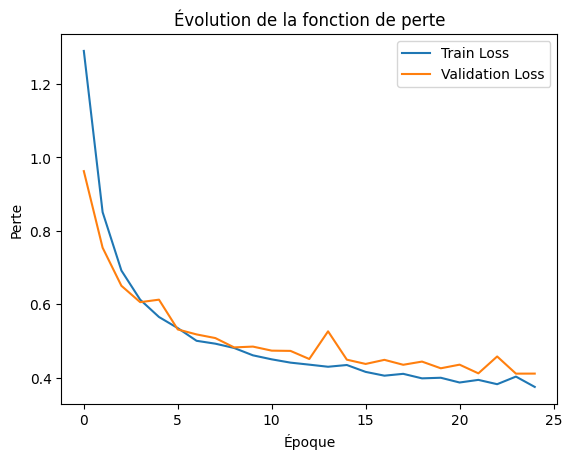

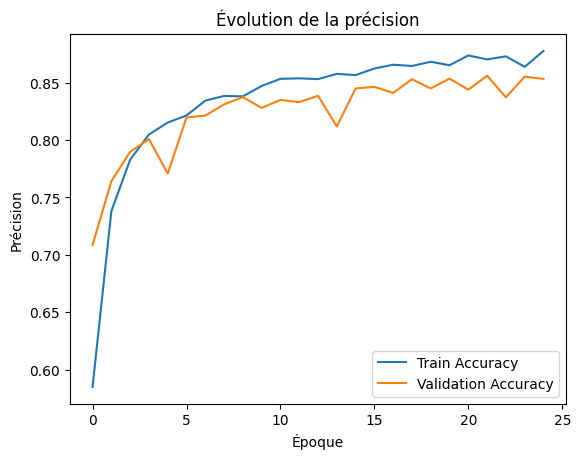

113/113 [==============================] - 0s 2ms/step - loss: 0.4111 - categorical_accuracy: 0.8533
Train loss : 0.37352922558784485 

Train accuracy : 0.8778471946716309 

Validation loss : 0.4111059904098511 

Validation accuracy : 0.8533333539962769 



In [ ]:
# Traçage de la fonction de perte pour l'ensemble d'entraînement et de validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Traçage de la précision pour l'ensemble d'entraînement et de validation
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.title('Évolution de la précision')
plt.legend()
plt.show()

trainLoss, trainAccuracy = model.evaluate(X_train, Y_train)
validationLoss, validationAccuracy = model.evaluate(X_test, Y_test)

print(f"Train loss : {trainLoss} \n")
print(f"Train accuracy : {trainAccuracy} \n")
print(f"Validation loss : {validationLoss} \n")
print(f"Validation accuracy : {validationAccuracy} \n")